In [ ]:
!git clone https://github.com/Mouneshgouda/Dog-and-Cat-Dataset.git

Cloning into 'Dog-and-Cat-Dataset'...
remote: Enumerating objects: 24999, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 24999 (delta 0), reused 0 (delta 0), pack-reused 24996 (from 1)
Receiving objects: 100% (24999/24999), 541.40 MiB | 29.15 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (24991/24991), done.


In [ ]:
train_path="/content/Dog-and-Cat-Dataset/data/train"
test_path="/content/Dog-and-Cat-Dataset/data/test"

In [ ]:
IMG_SIZE=64
BATCH_SIZE=32

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
train=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)
test=ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)
model=Sequential([
    Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),   #input layer
    Dense(128,activation="relu"),   #hidden layer
    Dense(1,activation="sigmoid")   #output layer
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(train,epochs=10)

Found 19989 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.5314 - loss: 1.1056
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5821 - loss: 0.7239
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.6029 - loss: 0.6605
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.6118 - loss: 0.6528
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6184 - loss: 0.6472
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.6360 - loss: 0.6365
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6254 - loss: 0.6421
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.6377 - loss: 0.6330
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - accuracy: 0.6506 - loss: 0.6276
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6582 - loss: 0.6167


In [ ]:
###testing for that trained model  ui

In [ ]:
from tensorflow.keras.preprocessing import image
import io
from PIL import Image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

Saving smallorangeandwhitekitteninflowers-120515.jpg to smallorangeandwhitekitteninflowers-120515.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


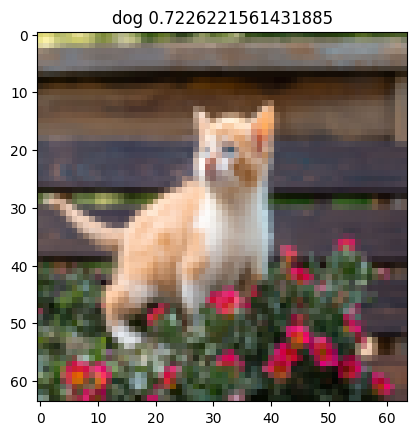

In [ ]:

uploaded=files.upload()

for filename in uploaded.keys():
  img=Image.open(filename).resize((IMG_SIZE,IMG_SIZE))   #resize the image
  img_ary=np.array(img)/255.0
  img_dim=np.expand_dims(img_ary,axis=0)
  prediction=model.predict(img_dim)[0][0]
  labels="dog" if prediction > 0.5 else "cat"
  confidence=prediction if prediction > 0.5 else 1-prediction

plt.imshow(img)
plt.title(f"{labels} {confidence}")

